Access to ten years of patient information ([source](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008)):

In [1]:
#added visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
df = pd.read_csv('data/hospital_readmissions.csv')
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


### The very first step - data verification

In [2]:
df.describe(include='all')

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
count,25000,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000,25000,25000,25000,25000,25000,25000,25000,25000
unique,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,8,8,8,3,3,2,2,2
top,[70-80),NaN,NaN,NaN,NaN,NaN,NaN,NaN,Missing,Circulatory,Other,Other,no,no,no,yes,no
freq,6837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12382,7824,9056,9107,23625,20938,13497,19228,13246
mean,NaN,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.dtypes

age                  object
time_in_hospital      int64
n_lab_procedures      int64
n_procedures          int64
n_medications         int64
n_outpatient          int64
n_inpatient           int64
n_emergency           int64
medical_specialty    object
diag_1               object
diag_2               object
diag_3               object
glucose_test         object
A1Ctest              object
change               object
diabetes_med         object
readmitted           object
dtype: object

In general, all of data ranges and percentiles make sense. Also, there are no unexpected values in the fields, because the 'unique' attribute shows that the number of distinctive names in each column is exactly as it is supposed to be according to the codebook. 
<br>

Data types of columns are right and fit the meaning of each characteristic(e.g. number of inpatient days is represented by integers, primary diagnosis is of string type and so on). 
<br>

Based on those types, we can decide what statistical method to apply to the particular quality. 

# Short answers to each question:
<br>

### 1. What is the most common primary diagnosis by age group?
<br>

## The most common primary diagnoses of 40-50 years age bracket are of other groups not represented in the dataset. All other age groups are mostly diagnosed with circulatory diseases.
<br>

### 2. Some doctors believe diabetes might play a central role in readmission. Explore the effect of a diabetes diagnosis on readmission rates.
<br>

## Patients diagnosed with diabetes do not have higher chances of readmission. The influential factors are indicated and evaluated in the detailed part below in the 'Role of diabetes' section.
<br>

### 3. On what groups of patients should the hospital focus their follow-up efforts to better monitor patients with a high probability of readmission?
<br>

## The individuals in the 70-90 years old group must be considered the most thoroughly. Additionally, the individuals who visit cardiology department or internal medicine specialist and are diagnosed with either circulatory, respiratory or disease of other group and are prescribed with diabetes medication(not necessarily diagnosed with diabetes disease) are in the bigger risk zone. Also, the huge prerequisites for higher chances of readmissions are changes in patient's diabetes medication. People, who got a high result from A1C test or did not take it at all have higher readmission rates as well.
<br>



# Detailed investigation of every inquiry:
<br>


# The most common primary diagnosis by age group

Groupby and value_counts methods are going to help us to figure out the most common primary diagnosis within each age bracket:


In [4]:
com_prim_diseases = df.groupby('age')['diag_1'].value_counts().to_frame()
#com_prim_diseases = df.groupby('age')['diag_1'].value_counts()
#com_prim_diseases.columns = ['Number of Diseases per Age Group']
#com_prim_diseases.rename(columns = {0:'Number of Diseases per Age Group'})
com_prim_diseases


diag_1
age      diag_1                 
[40-50)  Other               750
         Circulatory         504
         Respiratory         376
         Diabetes            369
         Digestive           271
         Injury              162
         Musculoskeletal     100
[50-60)  Circulatory        1256
         Other              1164
         Respiratory         694
         Digestive           442
         Diabetes            393
         Injury              273
         Musculoskeletal     230
[60-70)  Circulatory        1962
         Other              1402
         Respiratory         836
         Digestive           554
         Injury              400
         Diabetes            385
         Musculoskeletal     373
         Missing               1
[70-80)  Circulatory        2392
         Other              1693
         Respiratory         964
         Digestive           585
         Injury              444
         Diabetes            385
         Musculoskeletal     373
         Missing               1
[80-90)  Circulatory        1482
         Other              1269
         Respiratory         691
         Digestive           402
         Injury              321
         Diabetes            181
         Musculoskeletal     168
         Missing               2
[90-100) Circulatory         228
         Other               220
         Respiratory         119
         Digestive            75
         Injury               66
         Diabetes             34
         Musculoskeletal       8

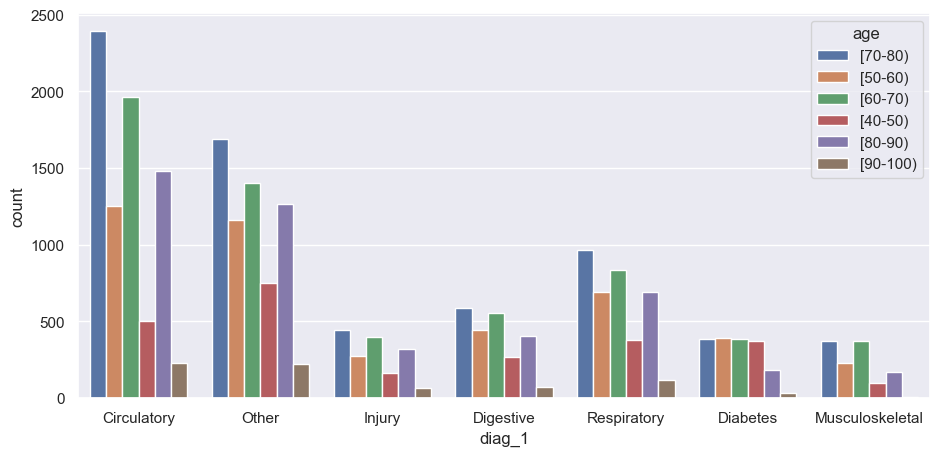

In [23]:
sns.set(rc={'figure.figsize':(11,5)})
df_noNan = df.replace('Missing', np.nan)
plot = sns.countplot(x = 'diag_1', hue='age', data=df_noNan)


We can conclude that the most common primary diseases are circulatory ones(e.g. arrhythmias, aneurysms, blood pressure conditions, etc.). The exception is '40-50 y.o' group, where the leader is the sum of illnesses of other types. Nevertheless, circulatory sicknesses are on the second place and do not fall behind too far.  

# Role of diabetes in readmission

The tables and graphs below are going to help us to clearly observe what is the impact of diseases of one or another group into readmission's possibility

readmitted
diag_1          readmitted            
Circulatory     no            0.520706
                yes           0.479294
Diabetes        yes           0.536348
                no            0.463652
Digestive       no            0.525547
                yes           0.474453
Injury          no            0.563625
                yes           0.436375
Musculoskeletal no            0.604633
                yes           0.395367
Other           no            0.548784
                yes           0.451216
Respiratory     no            0.509239
                yes           0.490761

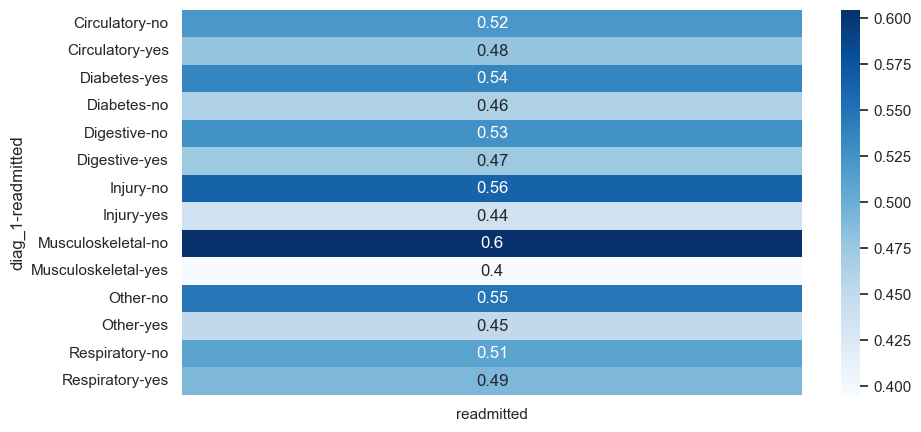

readmitted
diag_2          readmitted            
Circulatory     no            0.516597
                yes           0.483403
Diabetes        no            0.558500
                yes           0.441500
Digestive       no            0.557040
                yes           0.442960
Injury          no            0.593909
                yes           0.406091
Musculoskeletal no            0.537559
                yes           0.462441
Other           no            0.530919
                yes           0.469081
Respiratory     no            0.510446
                yes           0.489554

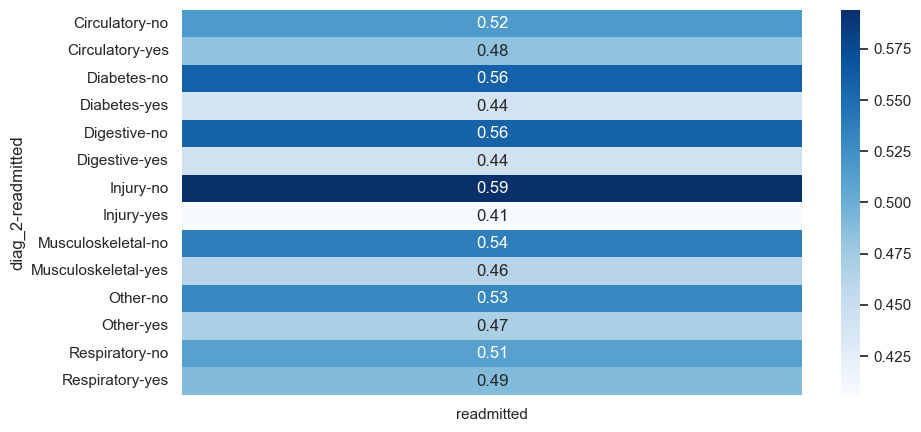

readmitted
diag_3          readmitted            
Circulatory     no            0.517044
                yes           0.482956
Diabetes        no            0.543065
                yes           0.456935
Digestive       no            0.530568
                yes           0.469432
Injury          no            0.575431
                yes           0.424569
Musculoskeletal no            0.549451
                yes           0.450549
Other           no            0.532997
                yes           0.467003
Respiratory     no            0.501828
                yes           0.498172

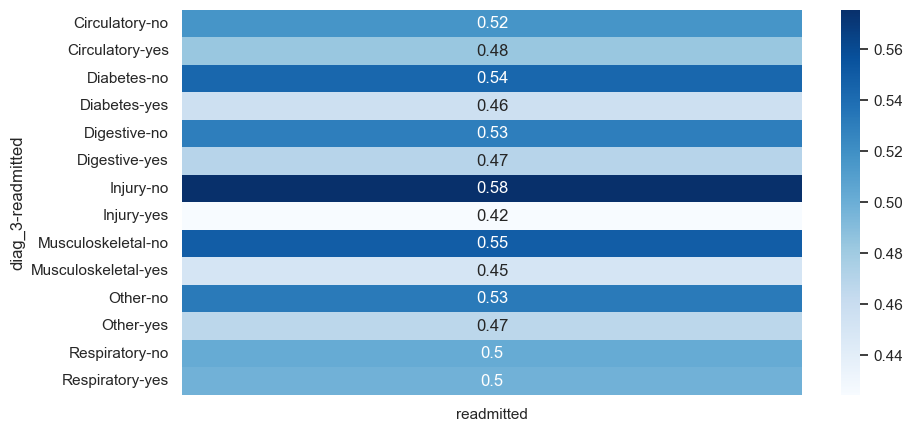

In [6]:
#I added the replace statement in the code in order to
#make output tables prettier and clearer by staving off
#missing values from being counted
diagnoses = ['diag_1', 'diag_2', 'diag_3']
for diagnose in diagnoses:
    df_noNan = df.replace('Missing', np.nan)
    Readmission_by_diag_1 = df_noNan.groupby(diagnose)['readmitted'].value_counts(normalize=True).to_frame()
    read_heat_map = sns.heatmap(data=Readmission_by_diag_1, annot=True, cmap="Blues")
    display(Readmission_by_diag_1)
    plt.show()
    


So what is obvious right away is that the fact diabetes being diagnosed does not increase chance of patient to be readmissioned. Nevertheless, we are not out of insights. The patients hospitalized with diseases of musculoskeletal type and injured individuals and their doctors can breathe out calmly as it seems their clients are the least likely to visit a clinician again in the nearest time, regardless of the priority of diagnosis. On contrary, the individuals diagnosed with circulatory or respiratory illness are more threatened to be readmissioned.

### The key conclusion of this question's investigation is that doctors' assumption about diabetes turned out to be invalid

# Who are the most frequently readmissioned persons?

We start off with looking at categorical variables. They are the ones, which describe the qualititave characteristics of patient and his stay in the hospital. For example, age group, information about glucose test and medical specialty of visited doctor.

At the begining of the research of a root cause of the substantial readmission rate, we are going to determine between what categorical variables and readmission correlation is. For that purpose we will perform a Chi-square test. Not to deepdiving in maths, just look at the second number of the result and as closer it is to zero as more confidently we can claim the fact that relationship exists. However, if it is more than 0.05, there is no correlation

In [7]:
#age is treated as a categorical variable , because it is divided in definded bins
cat_variables = ['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test',
       'A1Ctest', 'change', 'diabetes_med']
for cat in cat_variables:
    cross_readmit = pd.crosstab(index=df['readmitted'], columns=df[cat])
    display('Chi-square result for df['+cat+'] column =' +str(scipy.stats.chi2_contingency(cross_readmit, correction = True)))

'Chi-square result for df[age] column =(48.787297263120706, 2.4528660957495622e-09, 5, array([[1341.55488, 2358.84768, 3132.94392, 3622.51608, 2392.75744,\n         397.38   ],\n       [1190.44512, 2093.15232, 2780.05608, 3214.48392, 2123.24256,\n         352.62   ]]))'

'Chi-square result for df[medical_specialty] column =(85.51193444574231, 2.585774946587015e-16, 6, array([[ 746.54456,  998.7484 ,  997.15888, 1888.8796 , 6560.47888,\n        1411.49376,  642.69592],\n       [ 662.45544,  886.2516 ,  884.84112, 1676.1204 , 5821.52112,\n        1252.50624,  570.30408]]))'

'Chi-square result for df[diag_1] column =(84.9093366990503, 1.3681098778977244e-15, 7, array([[4.14546816e+03, 9.25630480e+02, 1.23399736e+03, 8.82713440e+02,\n        2.11936000e+00, 6.63359680e+02, 3.44290032e+03, 1.94981120e+03],\n       [3.67853184e+03, 8.21369520e+02, 1.09500264e+03, 7.83286560e+02,\n        1.88064000e+00, 5.88640320e+02, 3.05509968e+03, 1.73018880e+03]]))'

'Chi-square result for df[diag_2] column =(33.138251263598946, 2.4951558937146264e-05, 7, array([[4309.71856, 1539.71504,  515.53432,  313.13544,   22.25328,\n         225.71184, 4798.23104, 1521.70048],\n       [3824.28144, 1366.28496,  457.46568,  277.86456,   19.74672,\n         200.28816, 4257.76896, 1350.29952]]))'

'Chi-square result for df[diag_3] column =(45.78323670239514, 9.633360544318007e-08, 7, array([[4072.35024, 2257.64824,  485.33344,  245.84576,  103.84864,\n         241.0772 , 4825.25288, 1014.6436 ],\n       [3613.64976, 2003.35176,  430.66656,  218.15424,   92.15136,\n         213.9228 , 4281.74712,  900.3564 ]]))'

'Chi-square result for df[glucose_test] column =(7.753214987229587, 0.020721002208701197, 2, array([[  363.47024, 12517.47   ,   365.05976],\n       [  322.52976, 11107.53   ,   323.94024]]))'

'Chi-square result for df[A1Ctest] column =(14.826035925143096, 0.0006033470652361825, 2, array([[ 1497.85768, 11093.78992,   654.3524 ],\n       [ 1329.14232,  9844.21008,   580.6476 ]]))'

'Chi-square result for df[change] column =(46.51351158916284, 9.098887998980001e-12, 1, array([[7151.25048, 6094.74952],\n       [6345.74952, 5408.25048]]))'

'Chi-square result for df[diabetes_med] column =(96.25564041916765, 1.0096710996814763e-22, 1, array([[ 3058.23648, 10187.76352],\n       [ 2713.76352,  9040.23648]]))'

Well, even though the p-values(the second number) differs for each attribute, all of them are considerably less than the significance level(0.05, in our case). Hence we well take in account all of the available categorical variables in order to figure out what their exact values leads to increasing of chance of patient's readmission. Frequency tables are going to help us with that:

           Frequency table of df[age]


readmitted
age      readmitted            
[40-50)  no            0.554897
         yes           0.445103
[50-60)  no            0.558401
         yes           0.441599
[60-70)  no            0.531541
         yes           0.468459
[70-80)  no            0.512067
         yes           0.487933
[80-90)  no            0.504207
         yes           0.495793
[90-100) no            0.578667
         yes           0.421333

                                                      Heatmap of a frequency of df[age]


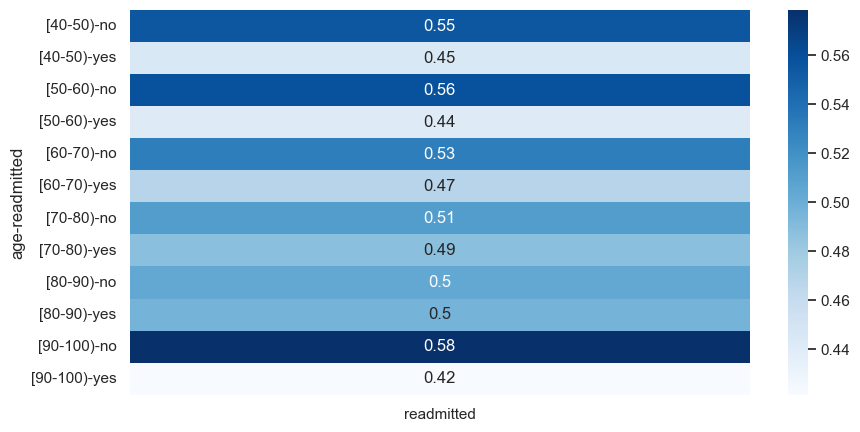

----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
           Frequency table of df[medical_specialty]


readmitted
medical_specialty      readmitted            
Cardiology             no            0.550035
                       yes           0.449965
Emergency/Trauma       no            0.506101
                       yes           0.493899
Family/GeneralPractice no            0.504782
                       yes           0.495218
InternalMedicine       no            0.552314
                       yes           0.447686
Other                  no            0.585210
                       yes           0.414790
Surgery                no            0.587799
                       yes           0.412201

                                                      Heatmap of a frequency of df[medical_specialty]


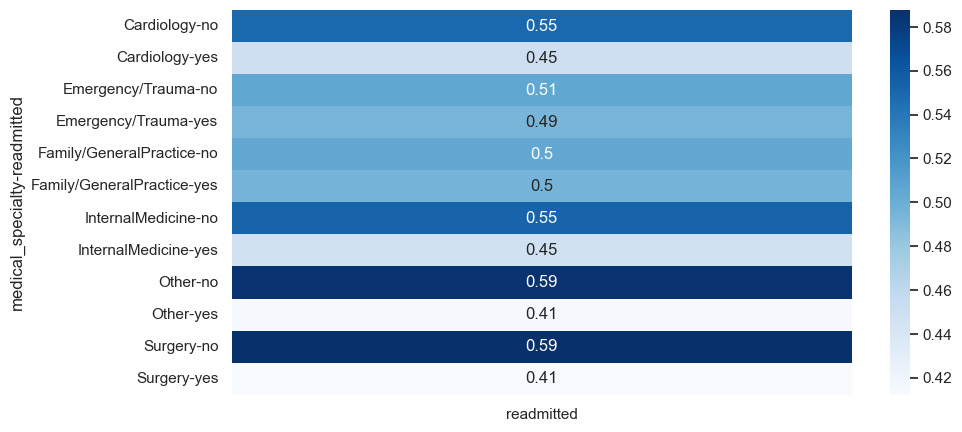

----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
           Frequency table of df[diag_1]


readmitted
diag_1          readmitted            
Circulatory     no            0.520706
                yes           0.479294
Diabetes        yes           0.536348
                no            0.463652
Digestive       no            0.525547
                yes           0.474453
Injury          no            0.563625
                yes           0.436375
Musculoskeletal no            0.604633
                yes           0.395367
Other           no            0.548784
                yes           0.451216
Respiratory     no            0.509239
                yes           0.490761

                                                      Heatmap of a frequency of df[diag_1]


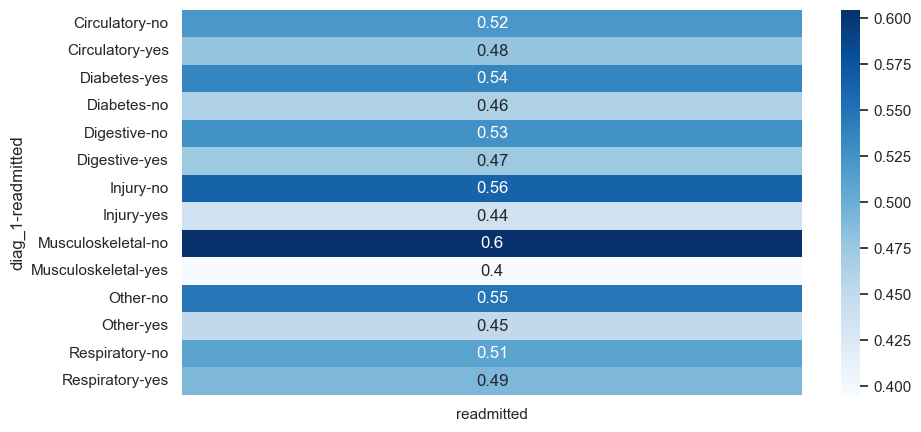

----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
           Frequency table of df[diag_2]


readmitted
diag_2          readmitted            
Circulatory     no            0.516597
                yes           0.483403
Diabetes        no            0.558500
                yes           0.441500
Digestive       no            0.557040
                yes           0.442960
Injury          no            0.593909
                yes           0.406091
Musculoskeletal no            0.537559
                yes           0.462441
Other           no            0.530919
                yes           0.469081
Respiratory     no            0.510446
                yes           0.489554

                                                      Heatmap of a frequency of df[diag_2]


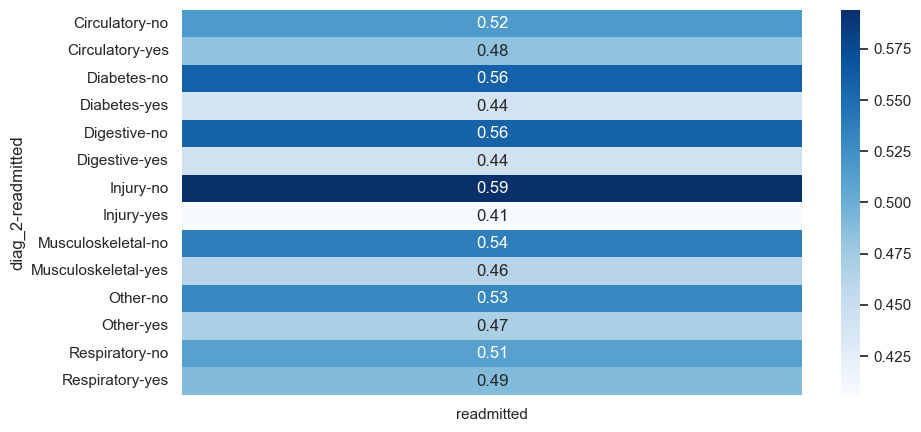

----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
           Frequency table of df[diag_3]


readmitted
diag_3          readmitted            
Circulatory     no            0.517044
                yes           0.482956
Diabetes        no            0.543065
                yes           0.456935
Digestive       no            0.530568
                yes           0.469432
Injury          no            0.575431
                yes           0.424569
Musculoskeletal no            0.549451
                yes           0.450549
Other           no            0.532997
                yes           0.467003
Respiratory     no            0.501828
                yes           0.498172

                                                      Heatmap of a frequency of df[diag_3]


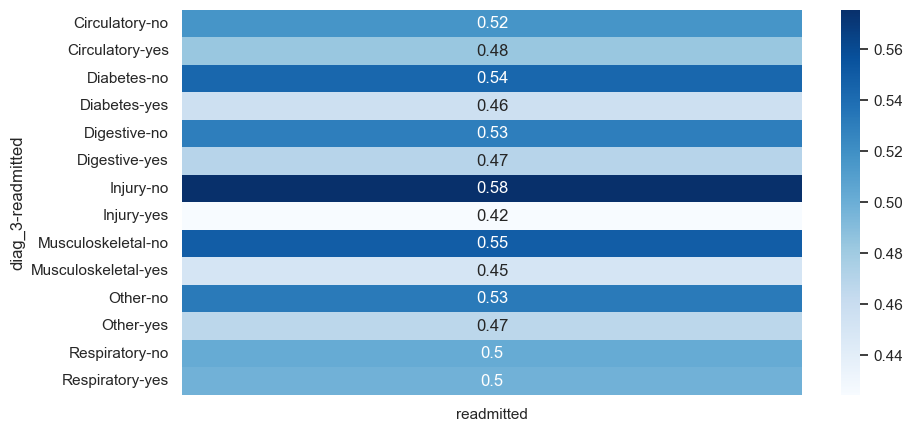

----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
           Frequency table of df[glucose_test]


readmitted
glucose_test readmitted            
high         yes           0.520408
             no            0.479592
no           no            0.531683
             yes           0.468317
normal       no            0.516691
             yes           0.483309

                                                      Heatmap of a frequency of df[glucose_test]


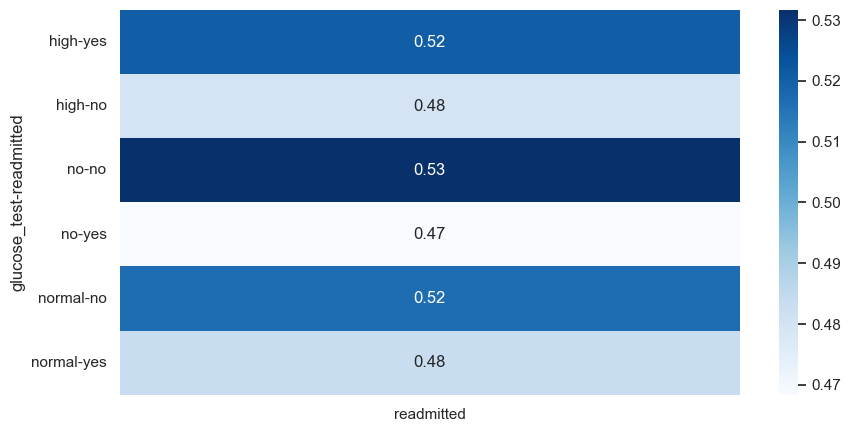

----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
           Frequency table of df[A1Ctest]


readmitted
A1Ctest readmitted            
high    no            0.540502
        yes           0.459498
no      no            0.525504
        yes           0.474496
normal  no            0.578947
        yes           0.421053

                                                      Heatmap of a frequency of df[A1Ctest]


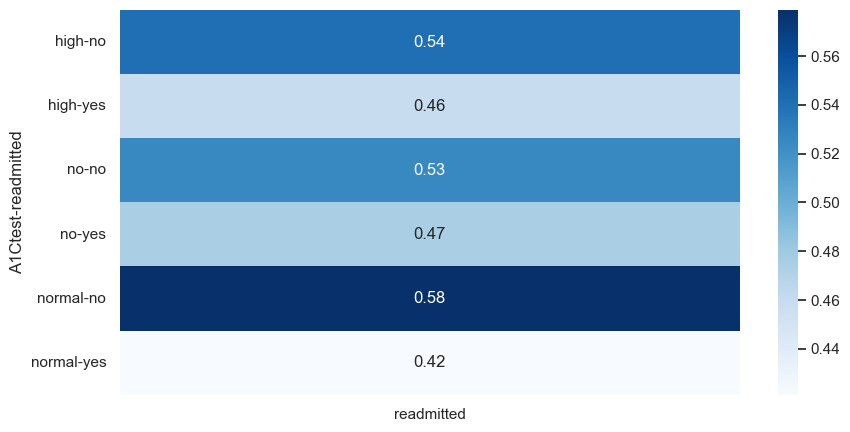

----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
           Frequency table of df[change]


readmitted
change readmitted            
no     no            0.549752
       yes           0.450248
yes    no            0.506477
       yes           0.493523

                                                      Heatmap of a frequency of df[change]


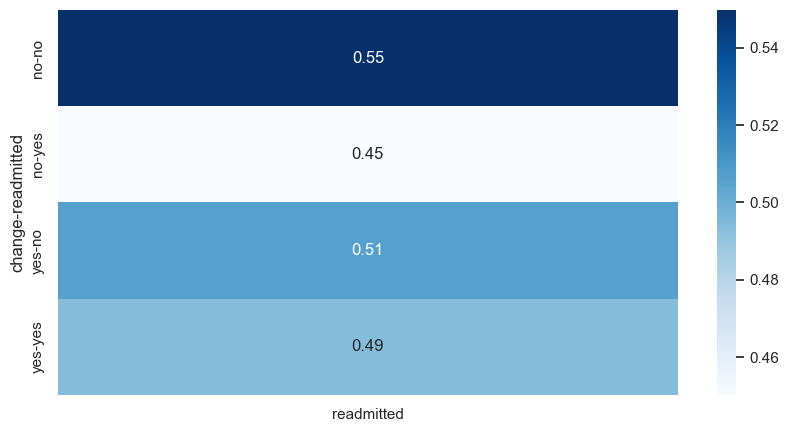

----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
           Frequency table of df[diabetes_med]


readmitted
diabetes_med readmitted            
no           no            0.586452
             yes           0.413548
yes          no            0.512846
             yes           0.487154

                                                      Heatmap of a frequency of df[diabetes_med]


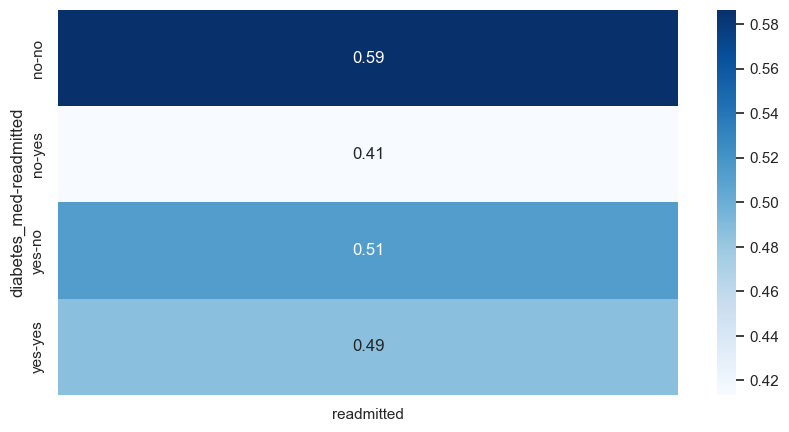

----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------


In [8]:
#I added the replace statement in the code in order to
#make output tables prettier and clearer by staving off
#missing values from being counted

#Also, I set the 'normalize' parameter to True, because we are not interested
#in the exact number of patients who were or not were readmitted,
#but rather the ratio of those who were hospitalized against who was not is the subject of the investigation
for cat in cat_variables:
    df_noNan = df.replace('Missing', np.nan)
    Readmission_by_diag_1 = df_noNan.groupby(cat)['readmitted'].value_counts(normalize=True).to_frame()
    read_heat_map = sns.heatmap(data=Readmission_by_diag_1, annot=True, cmap="Blues")
    print('           Frequency table of df['+cat+']')
    display(Readmission_by_diag_1)
    print('                                                      Heatmap of a frequency of df['+cat+']')
    plt.show()
    print("----------------------------------------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------------------------------------")

There is a lot of information to process. This is exactly what we needed!
In order to structurize our findings regarding each attribute and its effect on the readmission's likelihood I will briefly comment each column's result

1. It is not weird that as the patients get older they are readmissioned more frequenly, yet the people aged from 90 to 100 have the lowest probability of being readmissioned(seemingly, they are underrepresented) the fact is still the same. Thus, **the clinic should pay attention the most to the individuals of 70-90 age bracket**
<br> 

2. The patients, who admitted the doctors specialized in surgery and other areas not outlined in the dataset are least likely to be readmitted. People visited cardiology or internal medicine specialist are more probably to come back to the hospital, whereas **the clients of emergency/trauma and family/general practice departments have the highest chance of being readmitted**
<br>


3. Primary diagnosis. The musculoskeletal sicknesses positively stand out by being the least plausibly leading to readmission. All other types are close, however, **circulatory and respiratory diagnoses are the ones who bring the biggest chance of future readmission(the association with visiting the certain departments from the previous statement becomes prominent)** 

<br>


4. According to secondary diagnosis, a person, which got injured, is the least likely to readmit. Here it replaced musculoskeletal diagnoses which are in in the middle range as every other one is, except **respiratory and circulatory issues, sufferers of which again have the worst stakes, considering the question of being or not being readmitted** 
<br>

5. To not be repeated, in the frequencies of readmission depending on the tretitiary diagnosis, **the situation is compelety identical to the one with secondary diagnosis** 
<br>

6. Actually, the association between **glucose test** result and readmission column seems almost undetectable. Thus, we conclude **it has no impact on the anticipation of patient being readmitted** 
<br>

7. A1C test attribute is about to bring some insights into our investigation as there is a quite noticeable pattern connecting these two indicators. The people who got the normal results of this test can breathe out with relief their chances to readmit are less, comparing to the persons received 'high' outcome or, especially, the ones who did not take the test. **Hospital should consider performing more A1C tests in the future and treat those ones who got high results more carefully** 
<br>

8. Diabetes changes also have something to bring to the research table. **The patients whose diabetes medication was altered are more probable to readmit** 
<br>

9. The part, where we see the most strong connection - the individuals prescribed with diabetes are much more likely to visit the doctor at least once more. **Health centre must pay more attention to the people prescribed with diabetes medication, there is a great chance that those individuals are going to come back**


Let's take a closer look at the last finding. For that we will choose the patients who were prescribed with those medicals and see some details about them:

In [9]:
df_diab_med = df.loc[(df["diabetes_med"] == 'yes')]
cond = np.where((df["diabetes_med"] == 'yes') & (df['diag_1'] == 'Diabetes') | (df['diag_2'] == 'Diabetes') | (df['diag_3'] == 'Diabetes'))
df_diab_med_diab_diag = df.loc[cond]
x = 100 - round((df_diab_med_diab_diag.shape[0] / df_diab_med.shape[0]) * 100, 0)
display('Fraction of patients prescribed with diabetes medicals, but have no diabetes as first, secondary or tretiary diagnosis is '+str(x)+' per cents')

'Fraction of patients prescribed with diabetes medicals, but have no diabetes as first, secondary or tretiary diagnosis is 56.0 per cents'

That is strange, but a majority of individuals prescribed with diabetes medication are diagnosed with diabetes
                                              
**Disclaimer: maybe it is normal, but the author is not medical savvy**

The fraction of each sickness's group patients presribed with diabetes medications are related to:

## Fraction of primary diagnoses

,0
diag_1,
Circulatory,0.314035
Other,0.256762
Respiratory,0.152674
Digestive,0.081929
Diabetes,0.076675
Injury,0.065647
Musculoskeletal,0.052278


Text(0.5, 0, 'Primary Diagnosis')

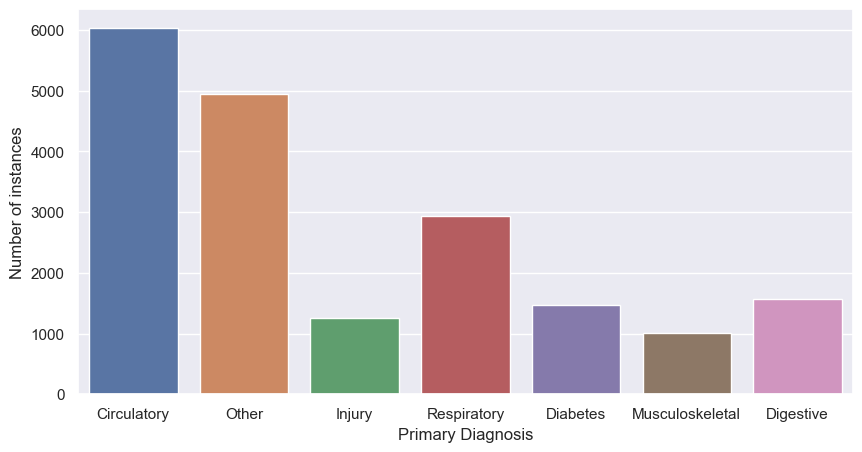

In [10]:
df_diab_med_noNaN = df_diab_med.replace('Missing', np.nan)
count1 = df_diab_med_noNaN.value_counts('diag_1', normalize=True).to_frame()
display(count1)
sns.countplot(x='diag_1', data=df_diab_med_noNaN)
plt.ylabel('Number of instances')
plt.xlabel('Primary Diagnosis')

## Fraction of secondary diagnoses

,0
diag_2,
Other,0.361510
Circulatory,0.321562
Diabetes,0.122240
Respiratory,0.117760
Digestive,0.034792
Injury,0.024792
Musculoskeletal,0.017344


Text(0.5, 0, 'Secondary Diagnosis')

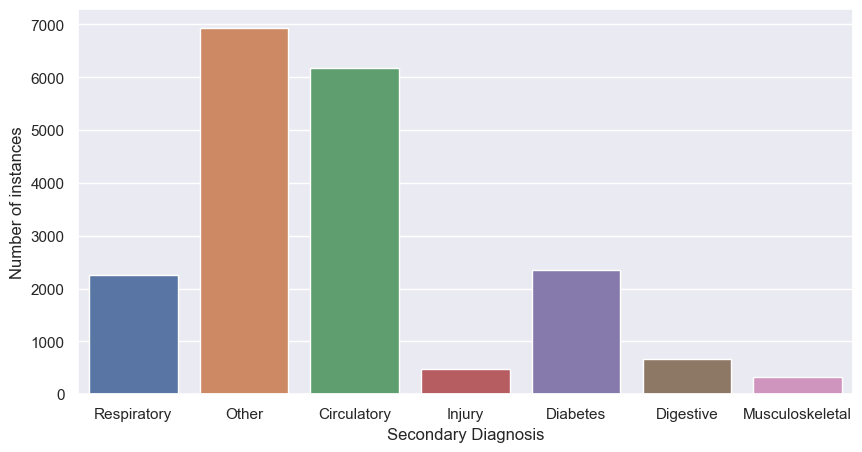

In [11]:
count2 = df_diab_med_noNaN.value_counts('diag_2', normalize=True).to_frame()
display(count2)
sns.countplot(x='diag_2', data=df_diab_med_noNaN)
plt.ylabel('Number of instances')
plt.xlabel('Secondary Diagnosis')

## Fraction of tretiary diagnoses

Text(0.5, 0, 'Tretiary Diagnosis')

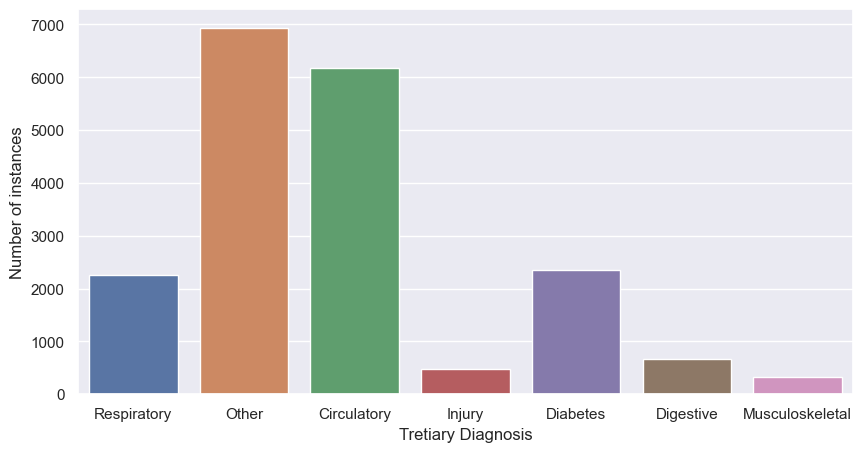

In [12]:
count3 = df_diab_med_noNaN.value_counts('diag_3', normalize=True).to_frame()
sns.countplot(x='diag_2', data=df_diab_med_noNaN)
plt.ylabel('Number of instances')
plt.xlabel('Tretiary Diagnosis')

Wrapping up the deepened investigation of the association between readmission likelihood and diabetes medication prescribed patients we conclude that there is no direct connection to diabetes diagnosis at all, because bigger half's diseases is not even in diabetes group. Whereas the circulatory illnesses and of other group are in the risk zone. By the way, here we have found why the patients admitted internal medicine specialist have increased readmission plausibility(high fraction of 'other' group) 

We have come to the second group of variables to explore the correlation between, ratio-scalable(numerical) and categorical dictonomous one(readmission). *Dictonomous attributes have only two possible declared values. For example, 0 or 1, male or female. In our case, yes or no.



The sckit.stats toolkit, including point biserial method, perfectly fits our test's needs and will help us to find the answer to the question - how does number of days in a hospital, patient's age and other measureable attributes affect readmission's chances

We start with creating a separate dataframe containing all columns of interest with 'readmitted' field's values transformed into 0 and 1 from no and yes correspondingly

In [13]:
df_pointbis_test = df[['time_in_hospital', 'n_lab_procedures','n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency', 'readmitted']]
df_pointbis_test['readmitted'] = df_pointbis_test['readmitted'].apply(lambda x: 1 if x == 'yes' else 0)
df_pointbis_test.head()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,readmitted
0,8,72,1,18,2,0,0,0
1,3,34,2,13,0,0,0,0
2,5,45,0,18,0,0,0,1
3,2,36,0,12,1,0,0,1
4,1,42,0,7,0,0,0,0


In [14]:
point_variables = ['time_in_hospital','n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency']
for point in point_variables:
    x = scipy.stats.pointbiserialr(df_pointbis_test[point], df_pointbis_test['readmitted'])
    display('Pointbiserialr result  for df['+point+'] column =' +str(x))
    


'Pointbiserialr result  for df[time_in_hospital] column =PointbiserialrResult(correlation=0.04314137154202701, pvalue=8.84870809731208e-12)'

'Pointbiserialr result  for df[n_lab_procedures] column =PointbiserialrResult(correlation=0.03297032231898418, pvalue=1.8458980103391473e-07)'

'Pointbiserialr result  for df[n_procedures] column =PointbiserialrResult(correlation=-0.04446685028658146, pvalue=2.0076148830730927e-12)'

'Pointbiserialr result  for df[n_medications] column =PointbiserialrResult(correlation=0.03687088041273312, pvalue=5.4934838339114e-09)'

'Pointbiserialr result  for df[n_outpatient] column =PointbiserialrResult(correlation=0.09548689199112015, pvalue=1.0017945634320104e-51)'

'Pointbiserialr result  for df[n_inpatient] column =PointbiserialrResult(correlation=0.2124804846724213, pvalue=3.9480764366778065e-253)'

'Pointbiserialr result  for df[n_emergency] column =PointbiserialrResult(correlation=0.09351855622058908, pvalue=1.1153085145964318e-49)'

So the correlation strength for each attribute with readmission plausibility is very low to take in consideration its contribution to the prediction outcomes. 
<br>

The exception is number of inpatient visits in the year before the hospital stay, there is the weak positive relationship detected(more inpatient visits = more likelihood of readmission) and it is statistically significant, because p-value is close to zero
<br>

**Author's remark:** it is really weird that even time spent in the hospital('time_in_hospital' attribute) does not impact the overall probability of readmission. That is where data science shows its true power: not only revealing the unexpected association, but in defuting the seemingly obvious patterns as well.  